# Netflix Analytics 
An Introduction to Data Processing, Visualization, and Analytics

### Importing Libraries

To begin our analysis of our data, we first have to import the necessary libraries that will help us facilitate our data analysis.

**Libraries** are collections of software that are written by the original software developers or third parties to extend the functionalities of the programming language.

In today's workshop we will be using **Pandas**, **re**, and **NumPy** for the processing portion of our analysis.

In [ ]:
#import statements
import pandas as pd
import numpy as np
import re

## Data Processing

### Data Tidying

**Motivation**:

Data in the real-world never comes in the way we hope it does in order to conduct analysis. The reality is that a lot of the time data is incomplete, inconsistent, or incorrect.

In order to fix this, we must embark on a process called data tidying (or data munging/ data wrangling).

Let's import our data and see what we're working with first:

In [ ]:
##create a dataframe from the imported dataset
df = pd.read_csv('netflix_titles_nov_2019.csv')

#view the first 5 rows of the data frame
df.head()

**A Note on Dataframes**

You can think of dataframes as essentially being equivalent to Excel spreadsheets - rows, columns, and indices that you're familiar with! We won't be going into them too deeply in this workshop, but feel free to read up more on them here: https://www.geeksforgeeks.org/python-pandas-dataframe/.

#### Interpretting Our Dataframe 

What questions do you have about the data?

When looking at this dataframe - what inconsistencies do you notice? 

What questions do you think we can answer with the data we have here?

#### Splitting the Dataframe


Personally, the first thing I noticed about this was the inconsistency of the data depending on the type of media it was. If you take a look at durations in the original dataframe, the duration of movies is in minutes and the duration of TV shows is in seasons. So, we are going to is divide these into separate dataframes.

In [ ]:
#view the different categorizations of type
df.type.unique()

The great thing about programming logic is that we can draw parallels to different programming langauges! Whenever we use the masking feature for dataframes, you can relate it to a SELECT query in SQL with a WHERE clause. For example, the line of code that we are using below can be translated to: 


**SELECT * <br>
FROM df <br>
WHERE type = 'TV Show';**

In [ ]:
#create a dataframe for TV shows - creating a deep copy
df_tv = df[df.type == 'TV Show'].copy()
df_tv.head()

In [ ]:
#Try It Yourself!
#create a dataframe for movies called df_movie by creating a deep copy
df_movie = df[df.type == 'Movie'].copy()
df_movie.head()

#### Using String Methods to Make Data Mathematical

Since we were focused on the problem of standardizing duration, we can go one step further with that to aid our analysis. 
Right now, our duration data is stored in our dataframe as a String. 

**String** refers to a data type that is sequence of characters (letters and numbers) that are stored together.

As someone who is reading the data, it is helpful to see that there is a unit of measurement that accompanies the data. However, as someone conducting analysis, this adds another step in cleansing because you **cannot perform mathematical operations on Strings**.

In [ ]:
#convert string values to ints - TV Shows
df_tv.duration = df_tv.duration.str.split(' ').str[0].astype(int)

df_tv.head()

In [ ]:
#renaming columns to make them easier to understand
df_tv.rename(columns = {'duration': 'seasons'}, inplace = True)

df_tv.head()

In [ ]:
#Try It Yourself!
#convert string values to ints - Movies
#rename duration to minutes

df_movie.duration = df_movie.duration.str.split(' ').str[0].astype(int)
df_movie.rename(columns = {'duration': 'minutes'}, inplace = True)
df_movie.head()

**Making Time Pretty with TimeDelta**

Even though all of us know how to convert minutes to hours, sometimes it's nice to format data differently for easier readability. In order to convert time in Python, we use the datetime library.

In [ ]:
#import datetime library

import datetime

In order to get the Hours:Minutes:Seconds format, you have to use str() around datetime.timedelta. You can convert hours, minutes, and seconds through this method.

In [ ]:
#let's try it out! 

str(datetime.timedelta(seconds=555))

In [ ]:
#Try It Yourself!
#convert the longest movie time to H:M:S format! Use the.max() function to get the longest movie time.

print(f'Your answer should be\n* {str(datetime.timedelta(minutes=df_movie.minutes.max()))} *')


**Questions**

What kind of questions can we answer after cleansing the data in this way? How can this data help Netflix/people making movies or TV shows?

#### Filtering Data by Words

Say that we are looking for media produced in a certain country, listed in a certain category, or described with a certain keyword. How would we go about that? The answer, as with a lot of the cleansing we have done thus far, has to do with string manipulation.

Let's start off by trying to find all of the movies produced in a certain country!

In [ ]:
#create a new dataframe for all of the movies created in India
#filter for only the rows containing India in the country column

india = df_movie[df_movie['country'].str.contains('India', na=False, regex=False)]

In [ ]:
#view the total number of movies made in India 

len(india)

Relate what we did above back to SQL - how would we write this as a query?


SELECT COUNT(*) <br>
FROM df_movie <br>
WHERE country = 'India';

### Exploratory Analysis and Inferences

Now that we have filtered by country, let's look into our new dataframe's characteristics more. 
What can we learn about movies made in India?

In [ ]:
#When were movies in India made?
india['release_year'].value_counts().head()

In [ ]:
#What is the average duration of movies made in India?
india['minutes'].mean()

#What is the average duration in hours?
str(datetime.timedelta(minutes=round(india['minutes'].mean())))

In [ ]:
#What are the ratings of movies made in India?
india['rating'].value_counts()

In [ ]:
#Who are the most popular directors for movies made in India?
india['director'].value_counts().head()

After taking a look at some of these numbers, what conclusions can we make about this data?

*Example of a strong inference*

From the 2019 Netflix data, it is clear to see that the number of movies made in India rated TV-14 greatly outnumbers all other ratings listed. This could be because many of the Indian movies hosted on Netflix were made for television originally and because the rating TV-14 is a largely ambiguous rating that accomodates some adult themes without necessitating a more mature rating. By having a lower rating and premiering on television, movies are able to be consumed by a larger audience and therefore possibly increase popularity which could translate to being picked up by Netflix. 

### Try It Yourself - Data Processing and Inferences

Take some time to filter your own dataframe by your favorite genre (look at the possible ones under listed_in). Run some exploratory analysis and come up with your own inference! 

## Data Visualization

*do not re-run these*

We are looking to be effective in our analysis and one of the ways is to visualise our results and Python makes this easy as the code to visualise data is quite simple for basic graphs and can be made much more complex if we want to make it more interesting.

In [ ]:
#import statements
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

### Simple Histogram using Matplotlib

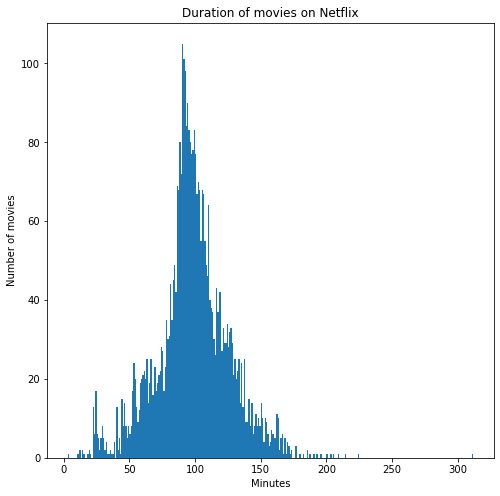

In [58]:
time = df_movie['minutes']
plt.figure(figsize=(8,8))
plt.hist(a, bins = np.arange(min(time), max(time) + 1, 1))

# Add title and axis names
plt.title('Duration of movies on Netflix')
plt.xlabel('Minutes')
plt.ylabel('Number of movies')
plt.show()

What kinds of conclusions can we make from this visualization?

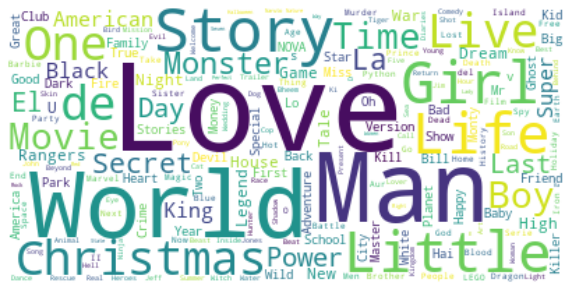

In [61]:
plt.figure(figsize=(10,10))

text = df['description'].values 

wordcloud = WordCloud().generate(str(text))
#Creating the text variable
text = " ".join(cat for cat in df.title)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

plt.show()

What kinds of conclusions can we make with this visualization?